<a href="https://colab.research.google.com/github/MMucahit/PyhtonDerinOrenmeFrancoisChollet/blob/main/Reuters(%C3%87oklu_S%C4%B1n%C4%B1fland%C4%B1rma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GPU mu kullanıyoruz ?

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Hangi GPU kullanıyoruz ?

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4250935849194686813, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3527979111933076742
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

Veri Setini Yükleme

In [3]:
## Metin sınıflandırmada sıkça kullanılan bir veri setidir. 46 farklı konu bulunur. Bazı konularda daha fazla örnek olsada her konudan en az 10 örnek bulunmaktadır.

from keras.datasets import reuters

In [4]:
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= num_words) ## En sık karşılaşılan 10000 kelime  

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
print('num of train_data: ',len(train_data))
print('num of test_data: ',len(test_data))

num of train_data:  8982
num of test_data:  2246


In [8]:
print(train_data[10]) ## IMDB veri setinde olduğu gibi her örnek tam sayılardan oluşan bir listedir.

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [20]:
word_index = reuters.get_word_index()
# print(word_index.items(),end= '\n\n') ## kelime ve indexleri sözlük içerisinde verilmiş.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index,end = '\n\n') ## sözlükdeki kelime ve indexleri ters çevirme işlemi
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) ## train_data daki haberleri text e çevirmek için yazılmış bir kod parçası.
print('train_data[0]: ', decode_newswire)
print('train_data[0] ın kategorisi: ', train_labels[0])

dict_items([('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804), ('passsengers', 20676), ('stipulate', 20677), ('heublein', 8352), ('screaming', 20713), ('tcby', 16261), ('four', 185), ('grains', 1642), ('broiler', 20680), ('wooden', 12090), ('wednesday', 1220), ('highveld', 13797), ('duffour', 7593), ('0053', 20681), ('elections', 3914), ('270', 2563), ('271', 3551), ('272', 5113), ('273', 3552), ('274', 3400), ('rudman', 7975), ('276', 3401), ('277', 3478), ('278', 3632), ('279', 4309), ('dormancy', 9381), ('errors', 7247), ('deferred', 3086), ('sptnd', 20683), ('cooking', 8805), ('stratabit', 20684), ('designing', 16262), ('metalurgicos', 20685), ('databank', 13798), ('300er', 20686), ('shocks', 20687), ('nawg', 7972), ('tnta', 20688), ('perforations', 20689), ('affiliates', 2891), ('27p', 20690), ('ching', 16263), ('china', 595), ('wagyu', 

Verileri Hazırlama

In [21]:
import numpy as np

In [24]:
def vectorize_sequence(sequences, dimension = num_words):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results  

In [25]:
x_train = vectorize_sequence(train_data) ## Eğitim verisinin vektöre dönüştürülmesi
x_test = vectorize_sequence(test_data) ## Test verisinin vektöre dönüştürülmes

In [42]:
num_of_labels = max([max(sequence) for sequence in [train_labels]])
num_of_labels

45

In [28]:
## Etiketleri One hot encode edilmesi ilk yöntem
def to_one_hot(labels, dimension = num_of_labels + 1):  ## +1 indisin 0 dan başlamasından dolayı
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results  

In [29]:
## Eğitim etiketlerinin vektöre dönüştürülmesi
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
## Kerasta one_hot yapmanın başka bir yolu ise:
from keras.utils.np_utils import to_categorical

In [32]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Ağı İnşa Etme

In [33]:
## IMBD(ikili sınıflandırmadan) farkı etiket sayısı 2 den 46 ya çıkmasıdır. IMDB de kullandığımız Dense katmanlarında her katman kendisinden önceki katmanın çıktı bilgisine ulaşabiliyor.
## Eğer bir katman bu bilgiyi öğrenemezse sonraki katmanın bunu telafi etmen şansı yok ve katmanların bir darboğaz haline gelme ihtimali bulunmaktadır.
## IMDB de 16 nöron ile ağı inşa etmiştirk bu örnekte 16 nöron yetersin kalacaktır. Böyle küçük katmanlar ileriye gerekli bilgiyi taşıyamadıkları için darboğaz oluşturacaklardır.
## Bu sebeble 64 nöron kullanacağız.

from keras import models
from keras import layers

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(64, activation= 'relu',))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax')) 
## Bu ağın çıktısının 46 farklı sınıfa ait olasılık dağılımı olaçağı anlamına gelmektedir. 
## Her girdi için 46 boyutlu bir vektör çıkacak ve output[i] i'inci sınıfa ait ait olma olasılığını gösterecektir. Bu 46 değerinin toplamı 1 olacaktır.

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']) ## Categorical_crossentropy iki olasılık arasındaki mesafeyi ölçer.

Validation Verisi Oluşturma

In [50]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Modelin Eğitilmesi

In [51]:
epoch = 20
batch = 512
history = model.fit(partial_x_train, partial_y_train, epochs = epoch, batch_size= batch, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 25ms/step - loss: 3.1481 - accuracy: 0.4264 - val_loss: 1.6574 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4180 - accuracy: 0.7040 - val_loss: 1.2897 - val_accuracy: 0.7380
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0613 - accuracy: 0.7767 - val_loss: 1.1219 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8241 - accuracy: 0.8236 - val_loss: 1.0454 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6571 - accuracy: 0.8608 - val_loss: 0.9640 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5100 - accuracy: 0.8925 - val_loss: 0.9475 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4134 - accuracy: 0.9141 - val_loss: 0.9543 - val_accuracy: 0.7960
Epoch 8/20
16

Eğitim ve Doğrulama Kayıplarını Çizdirme

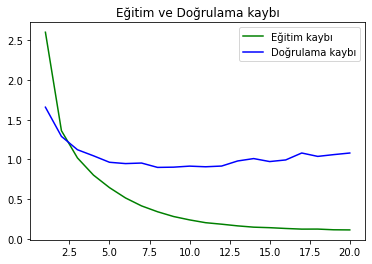

In [52]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g', label = 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'b', label = 'Doğrulama kaybı')
plt.title('Eğitim ve Doğrulama kaybı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Kayığ'
plt.legend()
plt.show()

Eğitim ve Doğrulama Başarımını Çizdirme

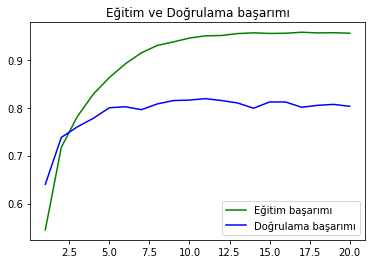

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label = 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'b', label = 'Doğrulama başarımı')
plt.title('Eğitim ve Doğrulama başarımı')
plt.xlabel = 'Epoklar'
plt.ylabel = 'Başarım'
plt.legend()
plt.show()

In [54]:
## Model 9. epokdan sonra overfitt olmaktadır. 9 Epok da durdurulabilir.
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.2414 - accuracy: 0.7845


[1.2414286136627197, 0.7845057845115662]

Tahmin

In [57]:
predictions = model.predict(x_test)
print(predictions[0].shape) ## Tahmin çıktısı 46 boyutludur.
print(np.sum(predictions[0])) ## Çıktının toplamları 1 dir.

(46,)
1.0


Yorumları texte çevirme ve categorylerini görme işlemi

In [78]:
def Text(index):
  decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[index]])
  return str(decode_newswire), test_labels[index]

In [83]:
text = Text(500)
print('text: ', text[0],end='\n\n')
print('category: ', text[1])

text:  ? shr profit three cts vs profit one ct net profit 129 082 vs profit 36 099 revs 3 864 187 vs 1 875 919 nine mths shr loss six cts vs profit two cts net loss 303 581 vs profit 110 311 revs 9 517 242 vs 5 248 105 note prior qtr and nine mth figures include ? of 15 000 dlrs and 48 000 dlrs respectively reuter 3

category:  3


Çevirdiğimiz text'i vectöre çevirip tahminde bulunma işlemi

In [81]:
text = text[0] 

import re

predict_words = re.sub('[.!,;?]', ' ', text).split()
predict_word_index = [word_index[word] + 3 for word in predict_words]
predict_data_x = np.zeros(num_words)
predict_data_x[predict_word_index] = 1
predict_data_x = predict_data_x.reshape(1, num_words)

result = model.predict(predict_data_x)
category = np.argmax(result)
print('category = {}'.format(category))

category = 3


# İleri Gözlemler

- Etiketleri Ve Kaybı işlemenin alternatif yolu

In [ ]:
## Etiketleri işleminin bir yoluda tam sayı tensörlerine çevirmektir.

In [84]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
## Etiketleri bu şekilde kullanmak için kayıp fonksiyonunu değiştirmek zorunda kalırız. 
## Bunun için 'categorical_crossentrpy' gibi etiketleri kategorik kodlama biçimde beklemeyen bir fonksiyon yerine 'sparse_categorical_crossentropy' kullanılır.

model.compile(optimizer= 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy']) ## Yine categorical_crossentropy gibi aynı matematik işlemleri yapar sadece farklı bir arayüze sahiptir.

- Yeterince Büyük Ara Katmanlara Sahip Olmanın Önemi

In [91]:
## Çıktıların 46 boyutlu olduğu için ara katmanların 46 gizli nörondan daha fazla birime sahip olmalıdır. 
## Şimdi ara katman nöron sayısının 46 dan düşük olması durumundaki darboğazı görelim.

model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax'))

model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs= epoch, batch_size= 128, validation_data= (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.4102 - accuracy: 0.0792 - val_loss: 2.3207 - val_accuracy: 0.3840
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.0559 - accuracy: 0.4531 - val_loss: 1.6503 - val_accuracy: 0.5770
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4942 - accuracy: 0.5946 - val_loss: 1.4782 - val_accuracy: 0.6040
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2678 - accuracy: 0.6384 - val_loss: 1.3640 - val_accuracy: 0.6640
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0904 - accuracy: 0.7263 - val_loss: 1.2925 - val_accuracy: 0.6980
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9468 - accuracy: 0.7625 - val_loss: 1.2815 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8484 - accuracy: 0.7861 - val_loss: 1.2668 - val_accuracy: 0.7140
Epoch 8/20
63/63 [==

In [92]:
## Bşarım 0.68 e düşmüştür. Batch_size = 512 olarak denediğimde başarım .58 lere düşmültür o yüzden batch size düşererek 128 yaptım ve başarım birazda olsa arttı ama darboğaz açık bir şekilde başarımı düşürmüştür.
result = model.evaluate(x_test, one_hot_test_labels)
result

71/71 [==============================] - 0s 3ms/step - loss: 2.1562 - accuracy: 0.6866


[2.1562271118164062, 0.6865538954734802]

- 3 gizli katman

In [93]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax'))

model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs= epoch, batch_size= batch, validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 3.1137 - accuracy: 0.3338 - val_loss: 1.6805 - val_accuracy: 0.5930
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4893 - accuracy: 0.6632 - val_loss: 1.3219 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1473 - accuracy: 0.7475 - val_loss: 1.1714 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9110 - accuracy: 0.8003 - val_loss: 1.0519 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6999 - accuracy: 0.8452 - val_loss: 1.0354 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5518 - accuracy: 0.8805 - val_loss: 1.0132 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4597 - accuracy: 0.8979 - val_loss: 1.0028 - val_accuracy: 0.8050
Epoch 8/20
16

In [94]:
result = model.evaluate(x_test, one_hot_test_labels)
result

71/71 [==============================] - 0s 3ms/step - loss: 1.3978 - accuracy: 0.7765


[1.3978452682495117, 0.7764915227890015]

- 1 gizli katman

In [95]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax'))

model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs= epoch, batch_size= batch, validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 3.1057 - accuracy: 0.4463 - val_loss: 1.8472 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5664 - accuracy: 0.7079 - val_loss: 1.3628 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1062 - accuracy: 0.7900 - val_loss: 1.1455 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8631 - accuracy: 0.8241 - val_loss: 1.0213 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6650 - accuracy: 0.8746 - val_loss: 0.9482 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5380 - accuracy: 0.8974 - val_loss: 0.8953 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4512 - accuracy: 0.9125 - val_loss: 0.8659 - val_accuracy: 0.8190
Epoch 8/20
16

In [96]:
result = model.evaluate(x_test, one_hot_test_labels)
result

71/71 [==============================] - 0s 3ms/step - loss: 1.0431 - accuracy: 0.7983


[1.0430588722229004, 0.7983080744743347]

- 128 nöron

In [97]:
model = models.Sequential()
model.add(layers.Dense(128, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax'))

model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs= epoch, batch_size= batch, validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.8232 - accuracy: 0.4222 - val_loss: 1.4167 - val_accuracy: 0.6940
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1876 - accuracy: 0.7417 - val_loss: 1.1135 - val_accuracy: 0.7540
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7917 - accuracy: 0.8338 - val_loss: 0.9845 - val_accuracy: 0.7990
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5723 - accuracy: 0.8830 - val_loss: 0.9512 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3997 - accuracy: 0.9195 - val_loss: 0.8764 - val_accuracy: 0.8150
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3059 - accuracy: 0.9367 - val_loss: 0.8752 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.2400 - accuracy: 0.9437 - val_loss: 0.9074 - val_accuracy: 0.8070
Epoch 8/20
16

In [98]:
result = model.evaluate(x_test, one_hot_test_labels)
result

71/71 [==============================] - 0s 3ms/step - loss: 1.3006 - accuracy: 0.7858


[1.3006079196929932, 0.7858415246009827]

- Batch_size = 64, Tek hidden Layer, epochs = 4 ile %80 başarımı yakaladık

In [119]:
model = models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape = (num_words,)))
model.add(layers.Dense(num_of_labels + 1, activation = 'softmax'))

model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train,partial_y_train, epochs= 4, batch_size= 64, validation_data= (x_val, y_val))

Epoch 1/4
125/125 [==============================] - 1s 5ms/step - loss: 2.1491 - accuracy: 0.5854 - val_loss: 1.0930 - val_accuracy: 0.7770
Epoch 2/4
125/125 [==============================] - 0s 4ms/step - loss: 0.8612 - accuracy: 0.8243 - val_loss: 0.8826 - val_accuracy: 0.8190
Epoch 3/4
125/125 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.8906 - val_loss: 0.8104 - val_accuracy: 0.8300
Epoch 4/4
125/125 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.9263 - val_loss: 0.8037 - val_accuracy: 0.8390


In [120]:
result = model.evaluate(x_test, one_hot_test_labels)
result

71/71 [==============================] - 0s 3ms/step - loss: 0.8834 - accuracy: 0.8054


[0.8834137916564941, 0.8054319024085999]